<a href="https://colab.research.google.com/github/SaieshaBehal/SaieshaBehal/blob/main/California_Housing_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

We will build different linear regression models for california house price prediction:

1. Linear regression (with normal equation and iterative optimization)
2. Polynomial regression
3. Regularized regression models-ridge and lasso

We will set regularization rate and polynomial degree with hyper-parameter tuning and cross validation

We will compare different models in terms of their parameter vectors and mean absolute error on train, development and test sets.

# Exploring the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

In [ ]:
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
print(california_housing.data.shape)
print(california_housing.target.shape)

(20640, 8)
(20640,)


In [ ]:
california_housing.frame.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [ ]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

The target contains median of the house value for each district. You can see that the target is a real number and hence this is a regression problem.

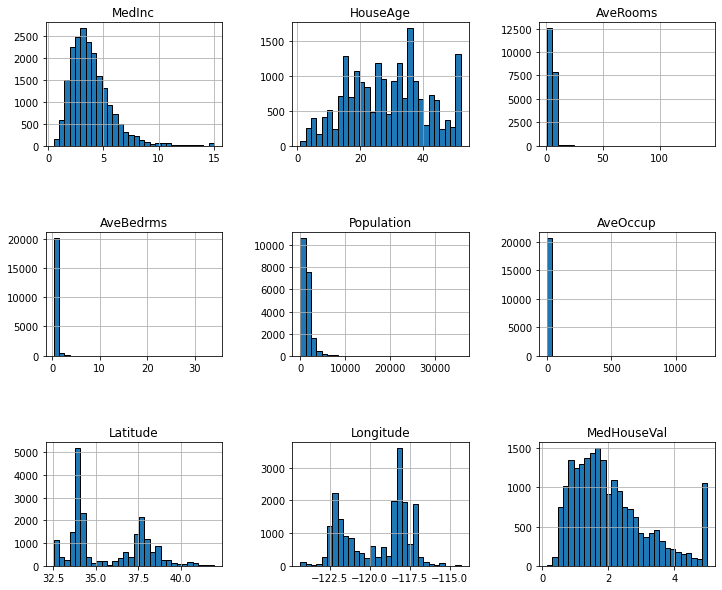

In [ ]:
california_housing.frame.hist(figsize=(12,10),bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Let's observe these histogram and note down our findings:

1. MedInc has a long tail distribution-salary of people is more or less normally distributed with a few folks getting a high salary.

2. HouseAge has more or less a uniform distribution.

3. The range for features, AveRooms, AveBedrms, AveOccups, Population, is large and its contains a small number of large values(as there are unnoticable bins on the right in the histograms plots of these features). That would mean that there could be certain outlier values present in these features.

4. Latitude and Longitude carry geographical information. Their combination helps us decide price of the house.

5. MedHouseVal also has a long tail distribution. It spikes towards the end. The reason is that the houses with price more than 5 are given value of 5.

In [ ]:
california_housing.frame.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

We can observe that there is a large difference between 75% and max values of AveRooms, AveBedrms, population and AveOccups - which confirms our intuition about presencce of outliers or extreme values 

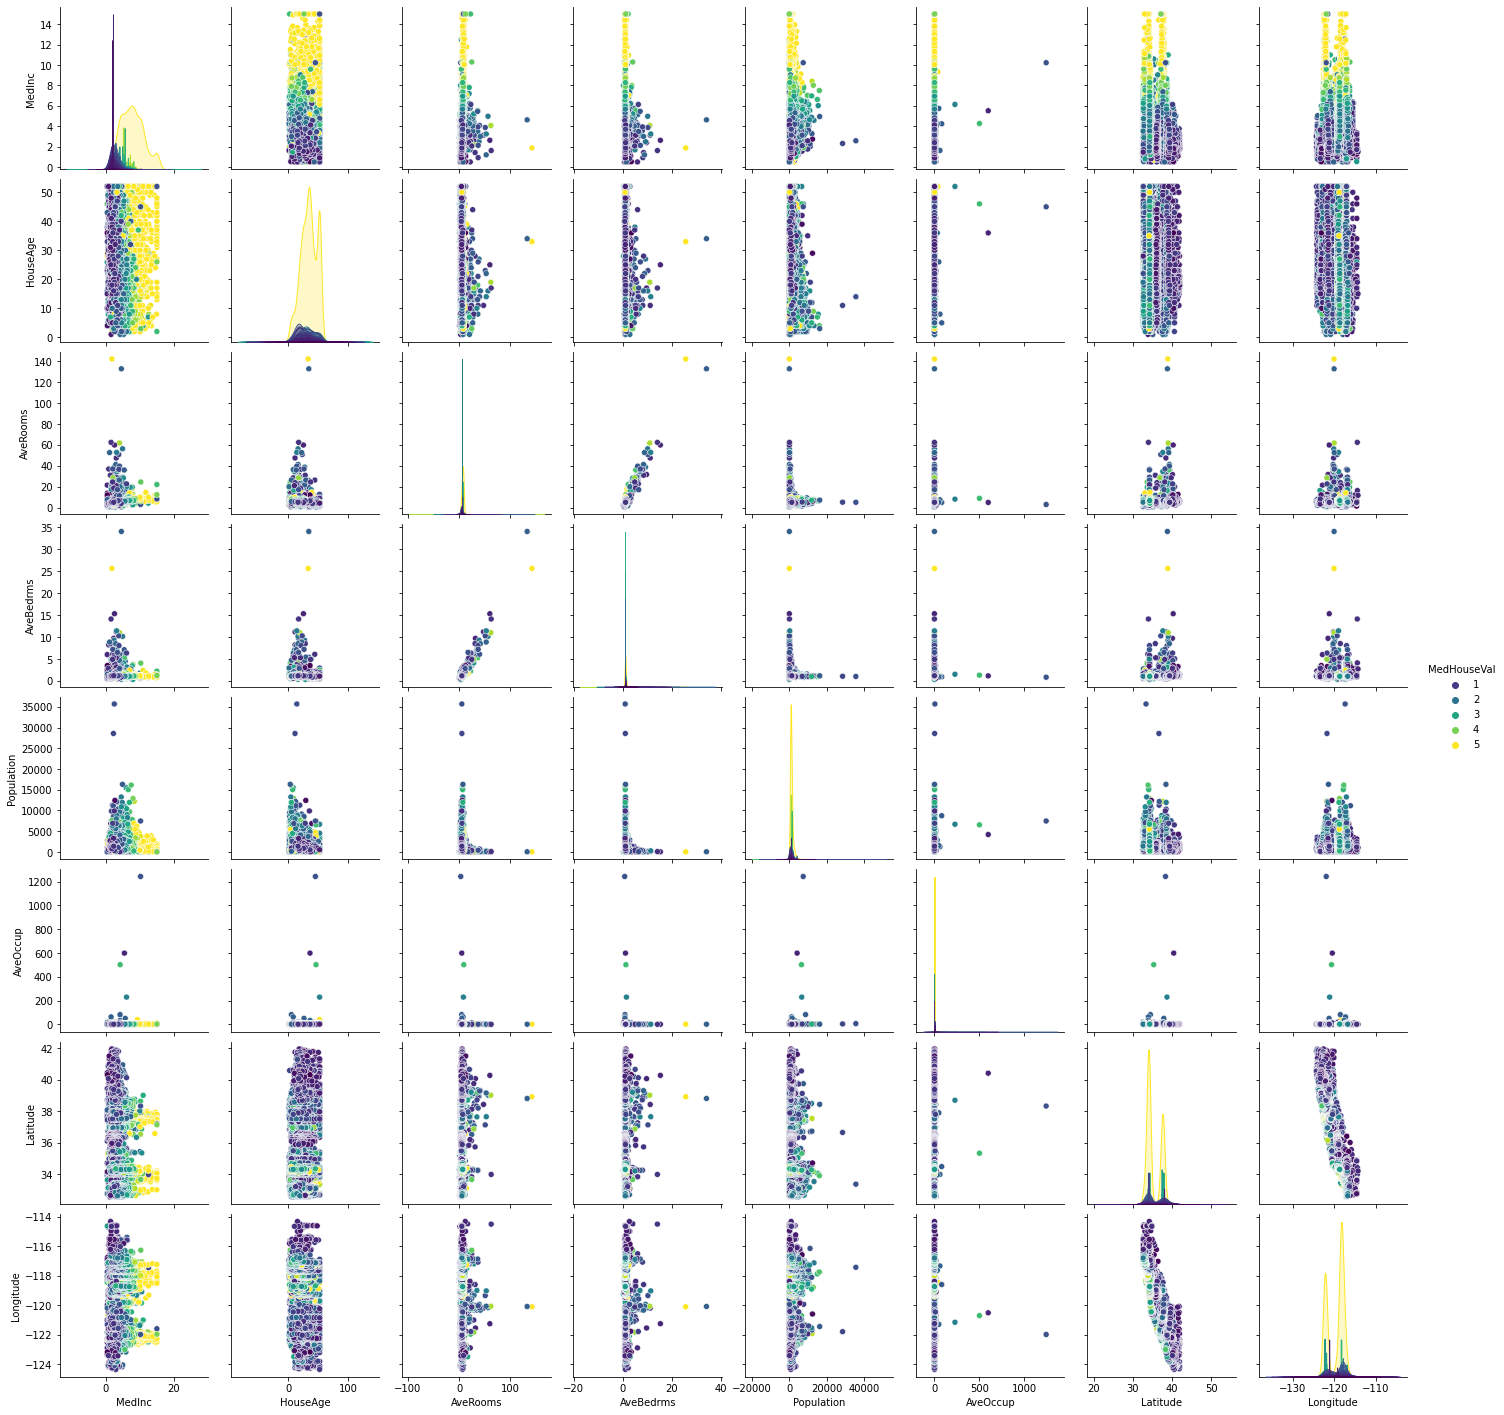

In [ ]:
plot = sns.pairplot(data=california_housing.frame, hue = 'MedHouseVal', palette='viridis')

A few observations based on pairplot:

1. MedIncome seems to be useful in distinguishing between low and high valued houses.

2. A few features have extreme values.

3. Latitude and logitude together seem to distinguish between low and high valued houses.

In [ ]:
from scipy.stats import loguniform 
from scipy.stats import uniform 

from sklearn.dummy import DummyRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.linear_model import SGDRegressor 

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error 

from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import validation_curve 
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler 

from sklearn.pipeline import Pipeline 

We will use ShuffleSplit cross validation with:

1. 10 folds (n_splits) and
2. Set aside 20% examples as test examples (test_size)

In [ ]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size = 0.2, random_state=0)

We will load the data and split it inot three parts- train, dev and test. 

Train+Dev will be used for cross validation and test will be used for evaluating the trained models.

In [ ]:
#Fetch dataset 
features, labels = fetch_california_housing(as_frame=True, return_X_y=True) 

#train-test-split 
com_train_features ,test_features, com_train_labels , test_labels = train_test_split(features, labels, random_state=42)

#train --> train + dev split 
train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels , random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split 
train_features ,test_features, train_labels, test_labels = train_test_split(features, labels, random_state = 42 )
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 8158 to 15795
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      15480 non-null  float64
 1   HouseAge    15480 non-null  float64
 2   AveRooms    15480 non-null  float64
 3   AveBedrms   15480 non-null  float64
 4   Population  15480 non-null  float64
 5   AveOccup    15480 non-null  float64
 6   Latitude    15480 non-null  float64
 7   Longitude   15480 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [ ]:
print('#training samples:', train_features.shape[0])
print('#test samples:', test_features.shape[0])

#training samples: 15480
#test samples: 5160


## Linear Regression : Normal Equation

In [ ]:
lin_reg_pipeline = Pipeline([
                             ("feature_scaling", StandardScaler()),
                             ("lin_reg", LinearRegression())]) 

lin_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [ ]:
print("Intercept:",lin_reg_pipeline[-1].intercept_)
print('Weight vector:',lin_reg_pipeline[-1].coef_)

Intercept: 2.0703489205426377
Weight vector: [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


**Evaluating model performance on the test set**

In [ ]:
test_score = lin_reg_pipeline.score(test_features, test_labels)
print('Model performance on test set:', test_score)

train_score = lin_reg_pipeline.score(train_features, train_labels)
print("Model performance on train set:", train_score)

Model performance on test set: 0.5910509795491352
Model performance on train set: 0.609873031052925


Since the score was computed on one fold that was selected as a test set, it may not be all that robust. 

In order to obtain robust estimate of the performance, we use cross_val_score that calculates score on different test folds through cross validation.

In [ ]:
lin_reg_score = cross_val_score(lin_reg_pipeline, train_features, train_labels, scoring='neg_mean_squared_error',cv = shuffle_split_cv) 
#n_splits =10 default value
#This will return 10 different scores, one for each fold.
print(lin_reg_score)

print(f'\nMean and Standard Deviation of the Score of linear regression model on the test set:\n'f"{lin_reg_score.mean():.3f}+/- {lin_reg_score.std():.3f}")

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]

Mean and Standard Deviation of the Score of linear regression model on the test set:
-0.529+/- 0.022


We just calculated cross_val_score based on the cross validation. It however return only scores of each fold. 

To access the models trained in each fold along with some other statistics like train error for that fold: Cross_validate API enables us to obtain them.

In [ ]:
lin_reg_cv_results = cross_validate(lin_reg_pipeline, train_features, train_labels, cv=shuffle_split_cv, scoring="neg_mean_squared_error", return_train_score=True, return_estimator=True)

The lin_reg_cv_result is a dictionary with the following contents:
  1. Trained estimators

  2. Time taken for fitting (fit_time) and scoring(score_time) the models in cross validation

  3. Training score(train_score)

  4. Test scores (test_score)

In [ ]:
lin_reg_cv_results

{'fit_time': array([0.02123141, 0.02287674, 0.03135014, 0.02139282, 0.01160431,
        0.02464843, 0.02612591, 0.02530074, 0.03148627, 0.03070498]),
 'score_time': array([0.0036087 , 0.01144648, 0.00965881, 0.00323391, 0.00706458,
        0.00899196, 0.01028347, 0.00896525, 0.00974798, 0.01149416]),
 'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('featu

We compare training and test errors to access generalization performance of our model. However we have training and test scores in the cv_results dictionary. Multiply these scores by -1 and convert them to errors.

In [ ]:
train_error = -1*lin_reg_cv_results['train_score']
test_error =  -1*lin_reg_cv_results['test_score']
print(f'Mean squared error (MSE) of linear regression model on the train set:\n', f"{train_error.mean():.3f}")

Mean squared error (MSE) of linear regression model on the train set:
 0.516


The training and test erros are high, which is an indication of underfitting, which we will confirm by plotting the learning curves.
Test error has higher variability across different folds compared to the train error.

Let's understand how the training set size or #samples affect the error. 
We can use Learning_curve API that calculates cross validation scores for different #samples as specified in argument train_sizes.

In [ ]:
def plot_learning_curve(train_sizes, train_scores, test_scores):
  train_score_mean = np.mean(-train_scores, axis=1)
  train_score_std = np.std(-train_scores, axis=1)
  test_score_mean = np.mean(-test_scores, axis=1)
  test_score_std = np.std(-test_scores, axis=1)
  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)

  plt.fill_between(train_sizes,
                   train_score_mean - train_score_std,
                   train_score_mean + train_score_std,
                   alpha=0.1,
                   color='r',)
  plt.fill_between(train_sizes,
                   test_score_mean + test_score_std,
                   test_score_mean -test_score_std,
                   alpha=0.1,
                   color='g')
  plt.plot(train_sizes, train_score_mean, "o-", color='r',lw=2)
  plt.plot(train_sizes, test_score_mean, "o-", color='g',lw=2)
  plt.xlabel("Training examples ")
  plt.ylabel("MSE")
  plt.legend(loc="best")  
  return plt.show()

In [ ]:
#Based on the scores caclulated by `learning_curve` API, we plot the error and its standard deviation for different #samples.
(train_sizes, train_scores, test_scores, fit_times,score_times) = learning_curve(
    lin_reg_pipeline,train_features, train_labels, cv=shuffle_split_cv,
    scoring='neg_mean_squared_error',n_jobs=-1,
    return_times=True, train_sizes=np.linspace(0.2,1,10))

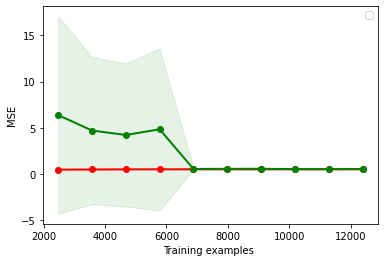

In [ ]:
plot_learning_curve(train_sizes,train_scores,test_scores) 

Observe that both curves have reached a plateau ; they are close and fairly high. Few instances in the training set means the model can fit them perfectly. But as more instances are added to the training set, it becomes impossible for the model to fit the training data perfectly. When the model is trained on very few training instances, it is not able to generalize properly, which is why the validation error is initially quite high. Then as the model learns more training examples, the training and validation error reduce slowly.

These learning curves are typical of underfitting model.

In [ ]:
#We can also study how training scales as the function of number of training samples.
def plot_scalability_curve(train_sizes, fit_times):
  train_score_mean = np.mean(-train_scores, axis=1)
  train_score_std = np.std(-train_scores, axis=1)
  test_score_mean = np.mean(-test_scores, axis=1)
  test_score_std = np.std(-test_scores, axis=1)
  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)

  plt.fill_between(train_sizes,
                   fit_times_mean - fit_times_std,
                   fit_times_mean + fit_times_std,
                   
                   alpha=0.1,
                   color='g',)
  
  plt.plot(train_sizes, fit_times_mean, "o-", color='b',lw=2)
  plt.xlabel("Training examples ")
  plt.ylabel("fit time")
  plt.legend(loc="best")  
  return plt.show() 

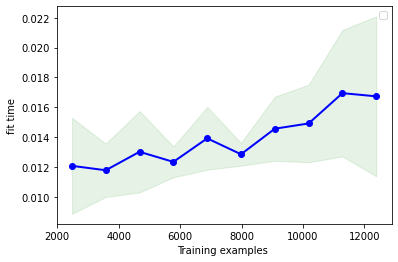

In [ ]:
plot_scalability_curve(train_sizes,fit_times)

As the number of training examples grows, the tie to fit also increases.

**Model examination**

Let's examine the weight vectors and how much variability exists between them across different cross-validated models.

In [ ]:
feature_names=train_features.columns 
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

For this we will first construct a dataframe of weight vectors and then plot them with box plot.

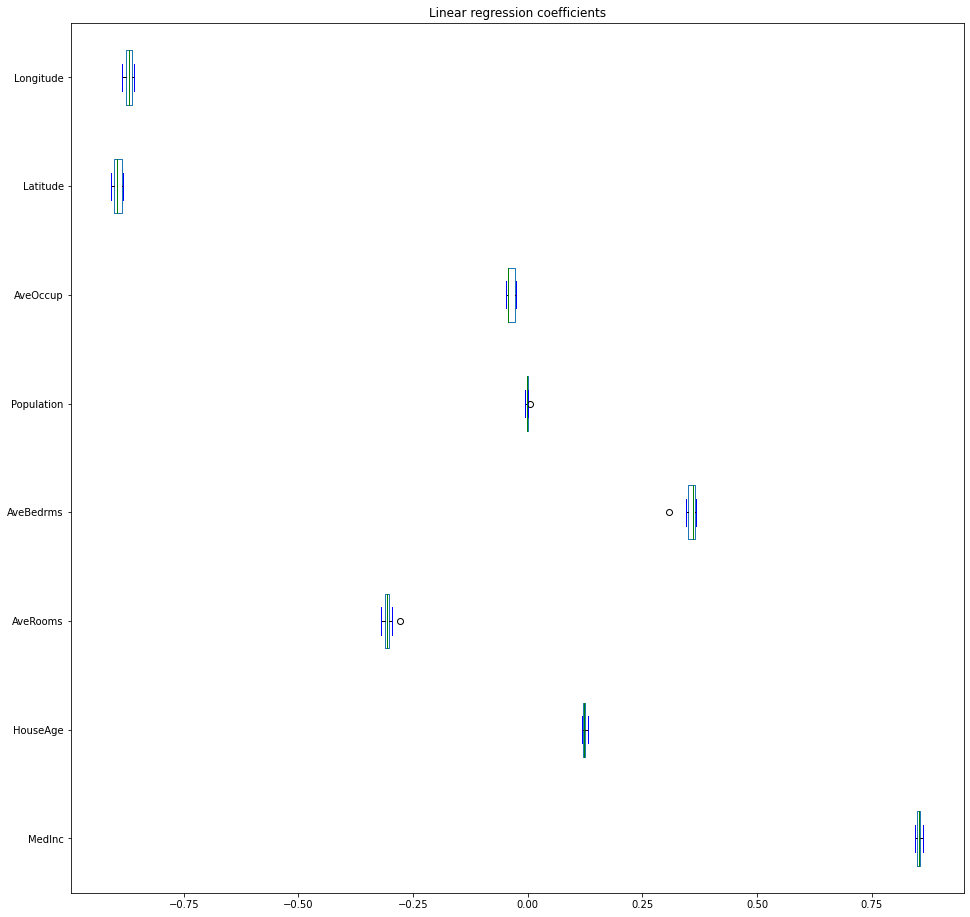

In [ ]:
coefs=[est[-1].coef_ for est in lin_reg_cv_results["estimator"]] 
weights_df = pd.DataFrame(coefs, columns=feature_names)

color = {'whiskers':"black","medians":"green","caps":"blue"}
weights_df.plot.box(color=color, vert=False,figsize=(16,16))
_=plt.title("Linear regression coefficients")

There is not much variability in weights by different models. It can also be seeb by the standard deviation of weights.

In [ ]:
weights_df.describe()

MedInc   HouseAge   AveRooms  AveBedrms  Population   AveOccup  \
count  10.000000  10.000000  10.000000  10.000000   10.000000  10.000000   
mean    0.852153   0.122770  -0.304384   0.353528   -0.001576  -0.037059   
std     0.005763   0.004312   0.010998   0.018044    0.003254   0.008582   
min     0.843517   0.117394  -0.318971   0.307474   -0.005787  -0.047584   
25%     0.848871   0.119895  -0.310778   0.349715   -0.002688  -0.042486   
50%     0.852711   0.121592  -0.305795   0.360139   -0.002063  -0.042325   
75%     0.854743   0.125520  -0.302980   0.364646   -0.000350  -0.027562   
max     0.861659   0.130560  -0.278426   0.367952    0.005297  -0.026331   

        Latitude  Longitude  
count  10.000000  10.000000  
mean   -0.894011  -0.869753  
std     0.009975   0.009097  
min    -0.908058  -0.884206  
25%    -0.901411  -0.876542  
50%    -0.895370  -0.869631  
75%    -0.883967  -0.862110  
max    -0.881884  -0.857844

**Selecting best model**

Let's select the model with the lowest cross validated test error as the best performance model.

In [ ]:
best_model_index = np.argmin(test_error) 
selected_model = lin_reg_cv_results['estimator'][best_model_index]

In [ ]:
print("Intercept:",selected_model['lin_reg'].intercept_)
print("coefficient vector:",selected_model['lin_reg'].coef_)

Intercept: 2.0779898917958657
coefficient vector: [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


**Model performance**

Towards this, let's first obtain the predictions for test points in cross validation.

In [ ]:
from sklearn.model_selection import cross_val_predict 
cv_predictions = cross_val_predict(lin_reg_pipeline, train_features, train_labels)

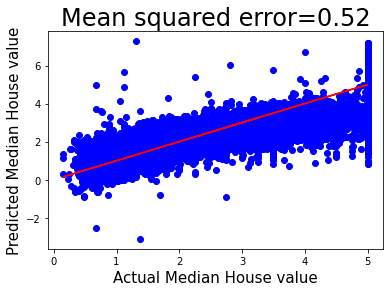

In [ ]:
mse_cv = mean_squared_error(train_labels,cv_predictions)

plt.scatter(train_labels, cv_predictions, color='blue')
plt.plot(train_labels, train_labels, 'r-')
plt.title(f"Mean squared error={mse_cv:.2f}",size=24)
plt.xlabel("Actual Median House value",size=15)
plt.ylabel("Predicted Median House value", size=15)
plt.show()

The model seems to all over the place in its predictions by looking at label 5.
There are some negative predictions. We can fix this by adding a constraints on the weights to be positive.

**Predictions**

We can use the best performing model from cross validation for getting predictions on the test set.

In [ ]:
test_predictions_cv = selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

In [ ]:
test_predictions = lin_reg_pipeline.predict(test_features)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

**Report model performance**

We report model performance on the test set.

In [ ]:
mse = mean_squared_error(test_labels,test_predictions)
mse_cv = mean_squared_error(test_labels, test_predictions_cv)

print("MSE for the best model obtained via cross validation:", mse_cv)
print("MSE for model without cv : ", mse)

MSE for the best model obtained via cross validation: 0.5393995876218523
MSE for model without cv :  0.5411287478470688


# Baseline Model

Now, we will build a baseline models using DummyRegression. We will compare performance of our linear regression model with the baseline model. 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import cross_validate 
from sklearn.model_selection import ShuffleSplit   
from sklearn.model_selection import train_test_split 

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.dummy import DummyRegressor

In [ ]:
def dummy_regressor_baseline(strategy, constant_val=None, quantile_val=None):
  baseline_model_median =DummyRegressor(strategy=strategy, 
                                        constant=constant_val,
                                        quantile=quantile_val)
  
  baseline_median_cv_results = cross_validate(baseline_model_median, train_features, train_labels, cv=shuffle_split_cv, n_jobs=2,  scoring='neg_mean_absolute_error')
  return pd.Series(-baseline_median_cv_results['test_score'],name="Dummy regressor error")

In [ ]:
baseline_median_cv_results_errors      = dummy_regressor_baseline(strategy='median')
baseline_mean_cv_results_errors        = dummy_regressor_baseline(strategy='mean')
baseline_constant_cv_results_errors    = dummy_regressor_baseline(strategy='constant',constant_val=2)
baseline_quantile_cv_results_errors    = dummy_regressor_baseline(strategy='quantile',quantile_val=0.55)

In [ ]:
dummy_error_df = pd.concat([baseline_median_cv_results_errors,    
baseline_mean_cv_results_errors ,       
baseline_constant_cv_results_errors,    
baseline_quantile_cv_results_errors],axis=1)

dummy_error_df.columns=["Median CV",'Mean CV','Constant CV','Quantile CV']
dummy_error_df['Median CV']

0    0.881187
1    0.873773
2    0.876366
3    0.892083
4    0.876835
5    0.874685
6    0.864097
7    0.888523
8    0.890963
9    0.886765
Name: Median CV, dtype: float64

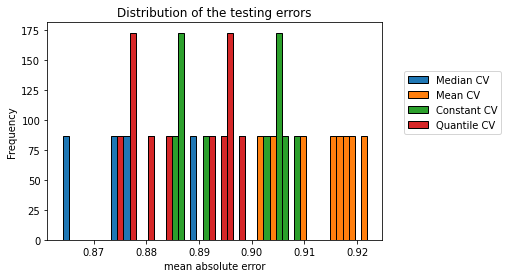

In [ ]:
dummy_error_df.plot.hist(bins=50, density=True,edgecolor='black')
plt.legend(bbox_to_anchor=(1.05,0.8), loc='upper left')
plt.xlabel("mean absolute error")
plt.ylabel('Frequency')
_=plt.title("Distribution of the testing errors")

**Model Comparison**

In [ ]:
lin_reg_errors=pd.Series(-lin_reg_cv_results['test_score'],name='Linear regression error')
error_df = pd.concat([lin_reg_errors,baseline_median_cv_results_errors],axis =1)

Text(0.5, 0, 'Mean absolute error')

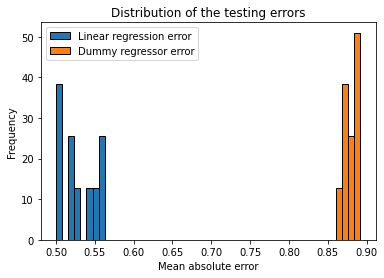

In [ ]:
error_df.plot.hist(bins=50, density=True, edgecolor='black')
plt.legend(loc='best')
_=plt.title('Distribution of the testing errors')
plt.xlabel("Mean absolute error")

# Linear regression with iterative optimization: SGDRegressor

We will build linear regression model, with SGDRegressor. SGD offers a lot of control over optimization procedure through a number of hyperparameters. However, we need to set them to right values in order to make it work for training the model.

In [ ]:
from sklearn.model_selection import validation_curve

Baseline SGDRegressor

STEP 1: To begin with, we instantiate a baselinen SGDRegressor model with default parameters.

STEP 2: Train the model with training feature matrix and labels

STEP 3: Obtain the score on the training and devel data.

In [ ]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
features, labels = fetch_california_housing(as_frame=True, return_X_y=True) 
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42) 
train_features,dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels, random_state=42)

In [ ]:
sgd = SGDRegressor(random_state=42)
sgd.fit(train_features,train_labels)

train_mae = mean_absolute_error(train_labels, sgd.predict(train_features))
dev_mae   = mean_absolute_error(dev_labels, sgd.predict(dev_features))
print("Mean absolute error on Training set: ", train_mae)
print("mean absolute error on dev set", dev_mae)

Mean absolute error on Training set:  312995824045833.75
mean absolute error on dev set 315394681503071.94


Adding a feature scaling step.

SGD is sensitive to feature scaling. Let's add a feature scaling step and check if we get better MAE.

In [ ]:
sgd_pipeline = Pipeline([
                         ('feature scaling ', StandardScaler() ),
                         ('sgd', SGDRegressor())])

sgd_pipeline.fit(train_features, train_labels)
train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features)) 
print("mean absolute error on training set : ", train_mae)
print("mean absolute error on dev set :", dev_mae)

mean absolute error on training set :  0.6747450156819584
mean absolute error on dev set : 0.8926330977240153


The error is still high let's run SGDRegressor step by step and investigate issues with training.

STEP1: Instantiate SGDRegressor with warm_start = True and tol=-np.infty.

STEP2: Train SGD step by step and record regression loss in each step.

STEP3: Plot learning curves and see if there are any issues in training.

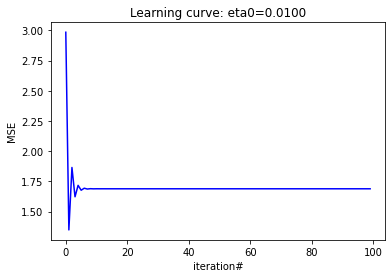

In [ ]:
eta0 = 1e-2 
sgd_pipeline = Pipeline([
                         ('feature_scaling', StandardScaler()),
                         ('sgd',SGDRegressor(max_iter=1, tol = -np.infty, warm_start=True, random_state=42))
])

loss = [] 
for epoch in range(100):
  sgd_pipeline.fit(train_features, train_labels) #continues where it left off 
  loss.append(mean_squared_error(train_labels, sgd_pipeline.predict(train_features))) 
plt.plot(np.arange(len(loss)), loss, 'b-')
plt.xlabel("iteration#")
plt.ylabel('MSE')
_=plt.title(f'Learning curve: eta0={eta0:.4f}')

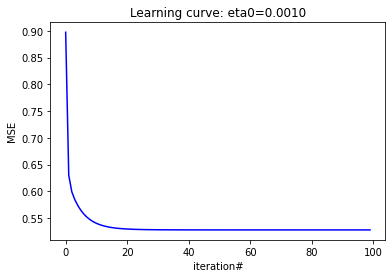

In [ ]:
eta0 = 1e-3
sgd_pipeline = Pipeline([
                         ('feature_scaling', StandardScaler()),
                         ('sgd',SGDRegressor(max_iter=1, tol = -np.infty, warm_start=True, eta0=eta0,random_state=42))
])

loss = [] 
for epoch in range(100):
  sgd_pipeline.fit(train_features, train_labels) #continues where it left off 
  loss.append(mean_squared_error(train_labels, sgd_pipeline.predict(train_features))) 
plt.plot(np.arange(len(loss)), loss, 'b-')
plt.xlabel("iteration#")
plt.ylabel('MSE')
_=plt.title(f'Learning curve: eta0={eta0:.4f}')

The above graph is an ideal learning curve where the train loss reduces monotonically as the training progresses.

In [ ]:
print("#iteration before reaching convergence criteria:", sgd_pipeline[-1].n_iter_) 
print("#weight updates:", sgd_pipeline[-1].t_)

#iteration before reaching convergence criteria: 1
#weight updates: 11611.0


In [ ]:
train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("mean absolute error on training set:", train_mae)
print("mean absolute error on dev set : ", dev_mae)

mean absolute error on training set: 0.5333732983042573
mean absolute error on dev set :  0.5190150280908042


Fixing learning rate through validation curves

STEP 1: Provide the list of values to be tried for a hyper-parameter.

STEP 2: Instantiate an object of validation_curve with estimator, training 
features and label. Set scoring parameter to relevant score.

STEP 3: Convert scores to error

STEP 4: Plot validation curve with the value of hyper-parameter on x-axis and error on the y-axis

STEP 5: Fix the hyper-parameter value where the test error is the least.

In [ ]:
eta0 = [1e-5, 1e-4, 1e-3, 1e-2]
train_scores ,test_scores = validation_curve(
    sgd_pipeline, com_train_features, com_train_labels, param_name="sgd__eta0", param_range=eta0, cv = shuffle_split_cv, scoring='neg_mean_squared_error', n_jobs=2)


train_errors, test_errors = -train_scores, -test_scores

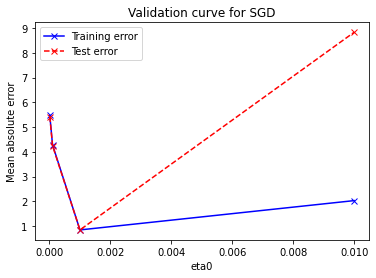

In [ ]:
train_errors, test_errors = - train_scores, -test_scores 
plt.plot(eta0, train_errors.mean(axis=1),'b-x',label="Training error")
plt.plot(eta0, test_errors.mean(axis=1),'r--x', label="Test error")
plt.legend() 
plt.xlabel("eta0")
plt.ylabel("Mean absolute error")
_=plt.title("Validation curve for SGD")

For eta0 = 1e-3, the test error is the least and hence we select that value as the value for eta0.

In [ ]:
#Finding out MAE with learning rate kept default
sgd_pipeline = Pipeline([
                         ("feature_scaling", StandardScaler()),
                         ("sgd", SGDRegressor(max_iter=500,
                                              early_stopping=True,
                                              eta0=1e-3,
                                              tol=1e-3,
                                              validation_fraction=0.2,
                                              n_iter_no_change=5,
                                              average=10,
                                              random_state=42))])

sgd_pipeline.fit(train_features, train_labels)

train_mae= mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set:", train_mae)
print("Mean absolute error on dev set:", dev_mae)

print("Number of SGD iterations# :", sgd_pipeline[-1].n_iter_)
print("Number of weight updates: ", sgd_pipeline[-1].t_)

Mean absolute error on Training set: 0.579376454514559
Mean absolute error on dev set: 0.5689180241137523
Number of SGD iterations# : 7
Number of weight updates:  81271.0


In [ ]:
#Finding out MAE when learning rate is 'constant
sgd_pipeline = Pipeline([
                         ("feature_scaling", StandardScaler()),
                         ("sgd", SGDRegressor(max_iter=500,
                                              early_stopping=True,
                                              eta0=1e-3,
                                              tol=1e-3,
                                              learning_rate = 'constant',
                                              validation_fraction=0.2,
                                              n_iter_no_change=5,
                                              average=10,
                                              random_state=42))])

sgd_pipeline.fit(train_features, train_labels)

train_mae= mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set:", train_mae)
print("Mean absolute error on dev set:", dev_mae)

print("Number of SGD iterations# :", sgd_pipeline[-1].n_iter_)  
print("Number of weight updates: ", sgd_pipeline[-1].t_)

Mean absolute error on Training set: 0.5359339681114987
Mean absolute error on dev set: 0.5151099728924144
Number of SGD iterations# : 8
Number of weight updates:  92881.0


In [ ]:
#Finding out MAE when learning rate is 'adaptive
sgd_pipeline = Pipeline([
                         ("feature_scaling", StandardScaler()),
                         ("sgd", SGDRegressor(max_iter=500,
                                              early_stopping=True,
                                              eta0=1e-3,
                                              tol=1e-3,
                                              learning_rate = 'adaptive',
                                              validation_fraction=0.2,
                                              n_iter_no_change=5,
                                              average=10,
                                              random_state=42))])

sgd_pipeline.fit(train_features, train_labels)

train_mae= mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set:", train_mae)
print("Mean absolute error on dev set:", dev_mae)

print("Number of SGD iterations# :", sgd_pipeline[-1].n_iter_)  
print("Number of weight updates: ", sgd_pipeline[-1].t_)

Mean absolute error on Training set: 0.5340193046836148
Mean absolute error on dev set: 0.5198356196858102
Number of SGD iterations# : 33
Number of weight updates:  383131.0


Setting max_iters as the best hyper-parameter value

In [ ]:
max_iter = np.ceil(1e6/com_train_features.shape[0])
max_iter

65.0

In [ ]:
sgd_pipeline = Pipeline([
                         ("feature_scaling", StandardScaler()),
                         ("sgd", SGDRegressor(max_iter=max_iter,
                                              early_stopping=True,
                                              eta0=1e-3,
                                              tol=1e-3,
                                              learning_rate = 'constant',
                                              validation_fraction=0.2,
                                              n_iter_no_change=5,
                                              average=10,
                                              random_state=42))])

sgd_pipeline.fit(train_features, train_labels)

train_mae= mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set:", train_mae)
print("Mean absolute error on dev set:", dev_mae)

print("Number of SGD iterations# :", sgd_pipeline[-1].n_iter_) 
print("Number of weight updates: ", sgd_pipeline[-1].t_)

Mean absolute error on Training set: 0.5359339681114987
Mean absolute error on dev set: 0.5151099728924144
Number of SGD iterations# : 8
Number of weight updates:  92881.0


Both the errors are close, but are not low. This points to underfitting. We can address it by adding more feature through polynomial regression.

# Polynomial regression

We will train a polynomial model with degree 2 and later we will use validation_curve to find out right degree to use for polynomial models. 

Polynomial Features transforms the features to the user specified degrees (here it is 2). We perform feature scaling on the transformed features before using them for training the regression model.

In [ ]:
poly_reg_pipeline =Pipeline([ 
                             ('poly',PolynomialFeatures(degree=2)),
                             ('feature_scaling',StandardScaler()),
                             ('lin_reg',LinearRegression())])

poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                     com_train_features,
                                     com_train_labels,
                                     cv =cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score = True,
                                     return_estimator=True) 

poly_reg_train_error = -1*poly_reg_cv_results['train_score']
poly_reg_test_error = -1*poly_reg_cv_results['test_score'] 

print("Mean absolute error of polynomial regression model of degree 2 on the train set:" , poly_reg_train_error.mean())

print("Mean absolute error of polynomial regression model of degree 2 on the test set:", poly_reg_test_error.mean())


Mean absolute error of polynomial regression model of degree 2 on the train set: 0.4609643523643526
Mean absolute error of polynomial regression model of degree 2 on the test set: 0.4854459947853937


Notice that the training and validation errors have reduced after using the second order polynomial features to represent the model.
Instead of using all polynomial feature, we use only interaction feature terms in polynomial model and train the linear regression model.

Instead of using all polynomial feature, we use only interaction feature terms in polynomial model and train the linear regression model.

In [ ]:
poly_reg_pipeline =Pipeline([ 
                             ('poly',PolynomialFeatures(degree=2,interaction_only=True)),
                             ('feature_scaling',StandardScaler()),
                             ('lin_reg',LinearRegression())])

poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                     com_train_features,
                                     com_train_labels,
                                     cv =cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score = True,
                                     return_estimator=True) 

poly_reg_train_error = -1*poly_reg_cv_results['train_score']
poly_reg_test_error = -1*poly_reg_cv_results['test_score'] 

print("Mean absolute error of polynomial regression model of degree 2 on the train set:", poly_reg_train_error.mean())

print("Mean absolute error of polynomial regression model of degree 2 on the test set:", poly_reg_test_error.mean())

Mean absolute error of polynomial regression model of degree 2 on the train set: 0.47781943309758984
Mean absolute error of polynomial regression model of degree 2 on the test set: 0.4968715693459049


Let's figure out which degree polynomial is better suited for the regression problem at our hand. 
For that we will use validation_curve, which can be considered as a manual huperparameter tuning.
Here we specify a list of values that we want to try for polynomial degree and specify it as a parameter in validation_curve.

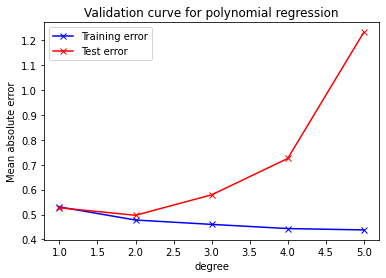

In [ ]:
degree = [1,2,3,4,5] 

train_scores, test_scores = validation_curve(
    poly_reg_pipeline, com_train_features,com_train_labels, param_name = 'poly__degree',
    param_range = degree, cv = cv, scoring='neg_mean_absolute_error', n_jobs=2
)

train_errors, test_errors = -train_scores, -test_scores 
plt.plot(degree, train_errors.mean(axis=1), 'b-x', label ="Training error")
plt.plot(degree, test_errors.mean(axis=1),'r-x', label= "Test error")
plt.legend() 

plt.xlabel("degree")
plt.ylabel("Mean absolute error")
_ = plt.title("Validation curve for polynomial regression")

We would select a degree for which the mean absolute error is the least. In this case, it is degree =2 that yields the least mean absolute error and that would be selected as an optimal degree for polynomial regression.

# Ridge regression

The polynomial models have a tendency to overfit - if we use higher order polynomialfeatures. 
We will use Ridge regression - which penalizes for excessive model complexity in the polynomial regression by adding a regularization term. Here we specify the regularization rate alpha as 0.5 and train the regression model. Later we will launch hyperparameter search for the right value of alpha such that it leads to the least cross validation errors.

Ridge HPT through GridSearchCV

In [ ]:
ridge_grid_pipeline =Pipeline([ 
                             ('poly',PolynomialFeatures(degree=2)),
                             ('feature_scaling',StandardScaler()),
                             ('ridge',Ridge())])

param_grid ={"poly__degree": (1,2,3),
             "ridge__alpha": np.logspace(-4,0, num=20)}
          

ridge_grid_search = GridSearchCV(ridge_grid_pipeline,
                                     param_grid=param_grid,                                 
                                     n_jobs=2,
                                     cv =cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score = True) 
ridge_grid_search.fit(com_train_features, com_train_labels)


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=2,
             param_grid={'poly__degree': (1, 2, 3),
                         'ridge__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
ridge_grid_search.best_index_

29

In [ ]:
mean_train_error = -1* ridge_grid_search.cv_results_['mean_train_score'][ridge_grid_search.best_index_]
mean_test_error = -1* ridge_grid_search.cv_results_['mean_test_score'][ridge_grid_search.best_index_]
std_train_error = -1* ridge_grid_search.cv_results_['std_train_score'][ridge_grid_search.best_index_]
std_test_error = -1* ridge_grid_search.cv_results_['std_test_score'][ridge_grid_search.best_index_]


print(f'Best Mean absolute error of polynomial ridge regression model on the train set:\n' f"{mean_train_error:.3f}")

print(f'Best Mean absolute error of polynomial ridge regression model on the test set:\n' f"{mean_test_error:.3f}")

Best Mean absolute error of polynomial ridge regression model on the train set:
0.463
Best Mean absolute error of polynomial ridge regression model on the test set:
0.474


In [ ]:
print("The best parameter value is :", ridge_grid_search.best_params_)

The best parameter value is : {'poly__degree': 2, 'ridge__alpha': 0.007847599703514606}


# Lasso regression

Lasso with GridSearchCV

In [ ]:
lasso_grid_pipeline =Pipeline([ 
                             ('poly',PolynomialFeatures()),
                             ('feature_scaling',StandardScaler()),
                             ('lasso',Lasso())])

param_grid ={"poly__degree": (1,2,3),
             "lasso__alpha": np.logspace(-4,0, num=20)}
          

lasso_grid_search = GridSearchCV(lasso_grid_pipeline,
                                     param_grid=param_grid,                                 
                                     n_jobs=2,
                                     cv =cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score = True) 
lasso_grid_search.fit(com_train_features, com_train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.638e+03, tolerance: 2.066e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=2,
             param_grid={'lasso__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00]),
                         'poly__degree': (1, 2, 3)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
mean_train_error = -1* lasso_grid_search.cv_results_['mean_train_score'][lasso_grid_search.best_index_]
mean_test_error = -1* lasso_grid_search.cv_results_['mean_test_score'][lasso_grid_search.best_index_]

print(f'Best Mean absolute error of polynomial lasso regression model on the train set:\n' f"{mean_train_error:.3f}")

print(f'Best Mean absolute error of polynomial lasso regression model on the test set:\n' f"{mean_test_error:.3f}")

Best Mean absolute error of polynomial lasso regression model on the train set:
0.462
Best Mean absolute error of polynomial lasso regression model on the test set:
0.488


In [ ]:
print("Mean cross validated score of the best estimator is:", lasso_grid_search.best_score_)
print("The best parameter value is:", lasso_grid_search.best_params_)

Mean cross validated score of the best estimator is: -0.48798304453391356
The best parameter value is: {'lasso__alpha': 0.0001, 'poly__degree': 3}


# **Performance on the test set**

1. **Baseline** **Model**

In [ ]:
baseline_model_median = DummyRegressor(strategy='median')
baseline_model_median.fit(train_features, train_labels)  
mean_absolute_percentage_error(test_labels, baseline_model_median.predict(test_features))

0.5348927548151625

2. **Linear regression with Normal equation**

In [ ]:
mean_absolute_percentage_error(test_labels, lin_reg_cv_results['estimator'][0].predict(test_features))

0.32120472175482906

3. **Linear Regression with SGD**

In [ ]:
mean_absolute_percentage_error(train_labels, sgd_pipeline.predict(train_features))

0.31320007329749927

4. **Polynomial Regression**

In [ ]:
poly_reg_pipeline.fit(com_train_features, com_train_labels) 
mean_absolute_percentage_error(test_labels, poly_reg_pipeline.predict(test_features))

0.2699298457648801

5. **Ridge Regression**

In [ ]:
mean_absolute_percentage_error(test_labels, ridge_grid_search.best_estimator_.predict(test_features))

0.2711033645141509

6. **Lasso Regression**

In [ ]:
mean_absolute_percentage_error(test_labels, lasso_grid_search.best_estimator_.predict(test_features))

0.28074969263810107

# Summary

We trained multiple linear regression models on housing dataset. Set their hyperparameters through hyper-parameter optimization. Retrained models with the best values of hyper-parameters and then evaluated their performance on the test data.